## <font color='blue'> In this notebook, we'll be analyzing Plank Legacy Archive Data using HEALPix's Equal-Area Pixelization Scheme to create CMB Power Spectra. </font>

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import healpy as hp

### Let's start off with reading the Commander CMB map through the full code, not the function.

In [2]:
com_map = hp.read_map("/data/a/cpac/abarnea/COM_CMB_IQU-commander_2048_R3.00_full.fits")
hp.write_map("Commander", com_map, overwrite=True)

FileNotFoundError: [Errno 2] No such file or directory: '/data/a/cpac/abarnea/COM_CMB_IQU-commander_2048_R3.00_full.fits'

In [9]:
print(com_map.shape)

nside = np.sqrt((com_map.shape)/12)
print(nside)

(50331648,)


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

0.0 180.0 -180.0 180.0


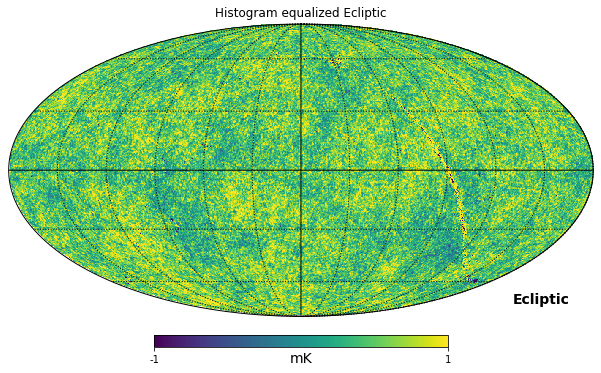

In [46]:
hp.mollview(
        com_map,
        coord=["G", "E"],
        title="Histogram equalized Ecliptic",
        unit="mK",
        norm="hist",
        min=-1,
        max=1,
        )
hp.graticule()

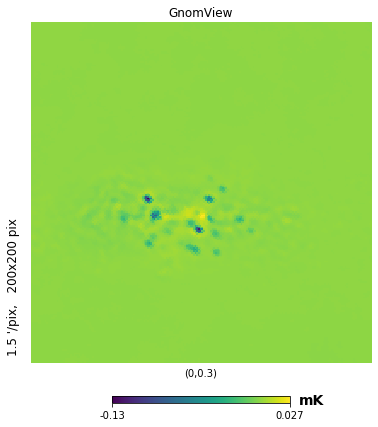

In [47]:
hp.gnomview(com_map, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [86]:
mask = hp.read_map("HFI_Mask_GalPlane-apo0_2048_R2.00.fits").astype(np.bool_)
com_map_masked = hp.ma(com_map)
com_map_masked.mask = np.logical_not(mask)

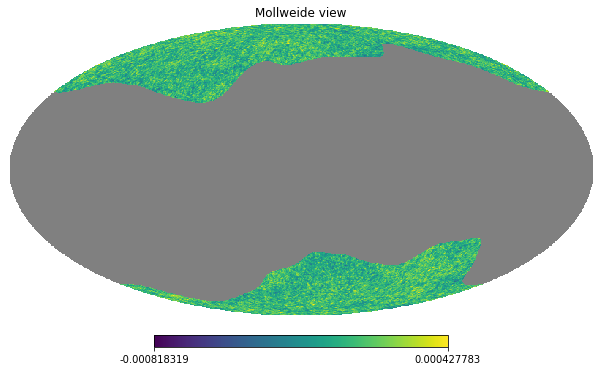

In [87]:
hp.mollview(com_map_masked.filled())

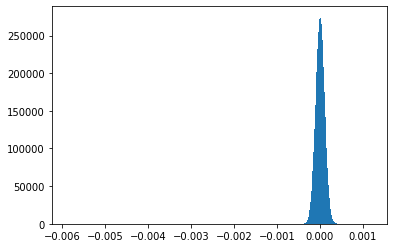

In [89]:
plt.hist(com_map_masked.compressed(), bins=1000);

In [90]:
LMAX = 1024
cl = hp.anafast(com_map_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

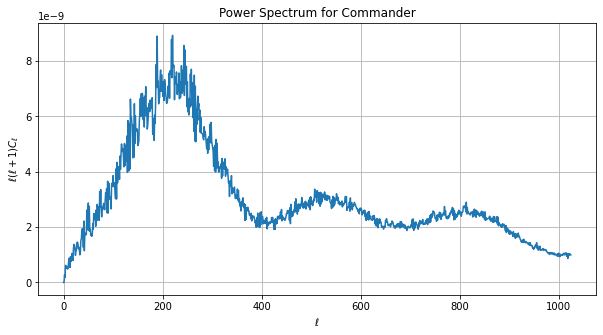

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.title("Power Spectrum for Commander")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

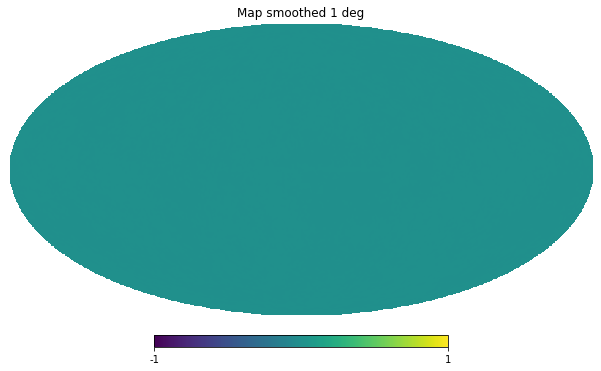

In [58]:
com_map_smoothed = hp.smoothing(com_map, fwhm=np.radians(1.))
hp.mollview(com_map_smoothed, min=-1, max=1, title="Map smoothed 1 deg")

### Let's write a function for this.

In [93]:
def anafast_power_spectrum(map_file, mask_file, name):
    cmb_map = hp.read_map(map_file)
    hp.write_map(name, cmb_map, overwrite=True)
    
    hp.mollview(
        cmb_map,
        coord=["G", "E"],
        title="Histogram equalized Ecliptic",
        unit="mK",
        norm="hist",
        min=-1,
        max=1,
        )
    hp.graticule()
    
    hp.gnomview(cmb_map, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")
    
    mask = hp.read_map(mask_file).astype(np.bool_)
    cmb_map_masked = hp.ma(cmb_map)
    cmb_map_masked.mask = np.logical_not(mask)
    
    hp.mollview(cmb_map_masked.filled())
    
    plt.hist(cmb_map_masked.compressed(), bins=1000);
    
    LMAX = 1024
    cl = hp.anafast(cmb_map_masked.filled(), lmax=LMAX)
    ell = np.arange(len(cl))
    
    plt.figure(figsize=(10, 5))
    plt.plot(ell, ell * (ell + 1) * cl)
    plt.xlabel("$\ell$")
    plt.ylabel("$\ell(\ell+1)C_{\ell}$")
    plt.title("Power Spectrum for {}".format(name))
    plt.grid()
    hp.write_cl("cl.fits", cl, overwrite=True)
    
    cmb_map_smoothed = hp.smoothing(cmb_map, fwhm=np.radians(1.))
    hp.mollview(cmb_map_smoothed, min=-1, max=1, title="Map smoothed 1 deg")

### Use the function and send in the SEVEM CMB map

setting the output map dtype to [dtype('>f4')]
0.0 180.0 -180.0 180.0


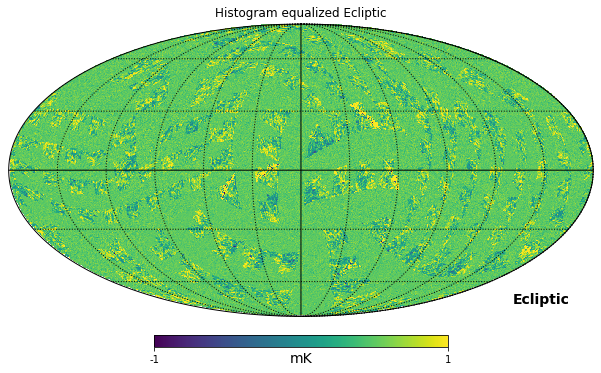

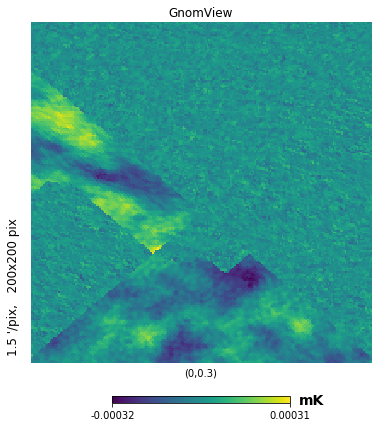

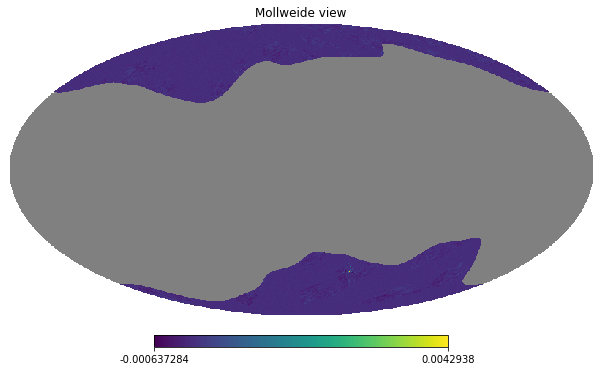

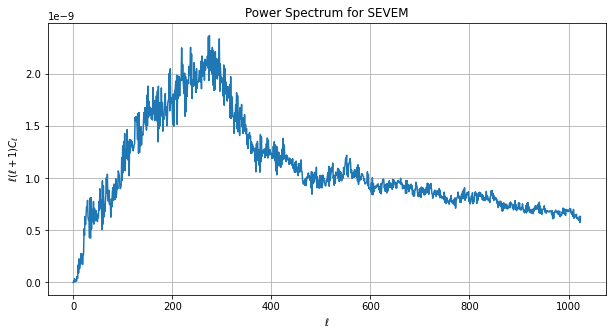

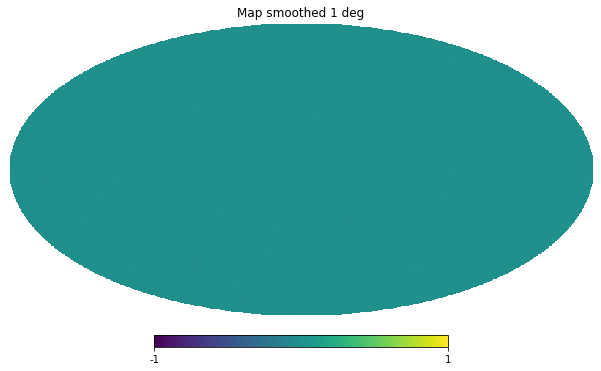

In [94]:
anafast_power_spectrum("COM_CMB_IQU-sevem_2048_R3.00_hm1.fits", "HFI_Mask_GalPlane-apo0_2048_R2.00.fits", "SEVEM")